In [1]:
import pandas as pd

dataset = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
dataset.shape

(918, 12)

There are a regular data quantity to train model.

In [3]:
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dataset do not have missing data, which is good.

In [4]:
dataset['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

There are two classes well balanced.

# Data visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style = 'whitegrid', palette = 'muted')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Ages distribution related to Heart Disease')

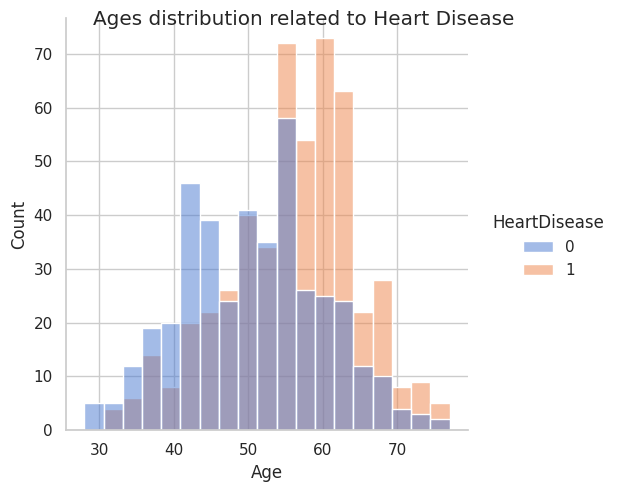

In [6]:
ax = sns.displot(
    x = 'Age',
    hue = 'HeartDisease',
    data = dataset
)
ax.fig.suptitle('Ages distribution related to Heart Disease')

The histogram shows a **strong relationship between age and heart disease**, which is more frequent in older individuals. This relationship is more visible in boxplot:

Text(0.5, 1.0, 'Age related to Heart Disease')

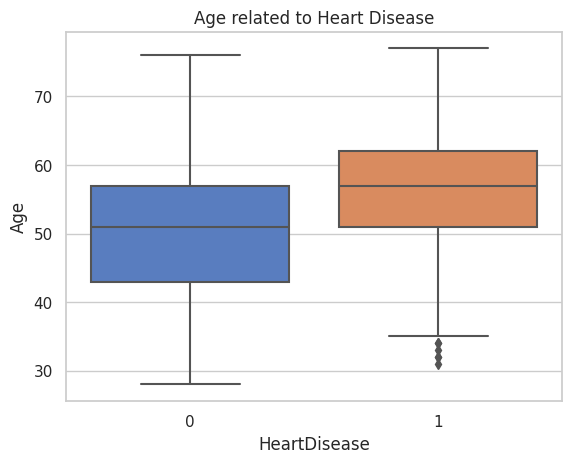

In [7]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Age'
)
ax.set_title('Age related to Heart Disease')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


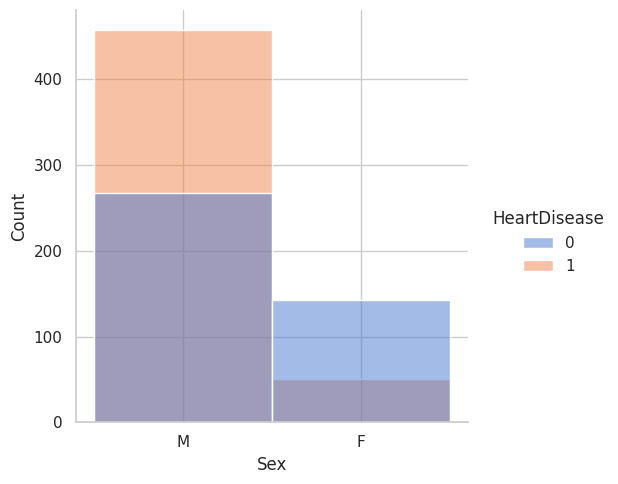

In [8]:
ax = sns.displot(
    data = dataset,
    x = 'Sex',
    hue = 'HeartDisease',
)

In [9]:
sex_totals = dataset['Sex'].value_counts()
heart_disease_totals = dataset.query('HeartDisease == 1')['Sex'].value_counts()
print('Heart disease rate on males: %.2f' % ((heart_disease_totals['M'] / sex_totals['M']) * 100))
print('Heart disease rate on females: %.2f' % ((heart_disease_totals['F'] / sex_totals['F']) * 100))

Heart disease rate on males: 63.17
Heart disease rate on females: 25.91


Data indicates that **males are more susceptible to heart diseases** than females. **However, that is a great difference between the total of males and females on dataset.**

Text(0.5, 1.0, 'Cholesterol related to Heart Disease')

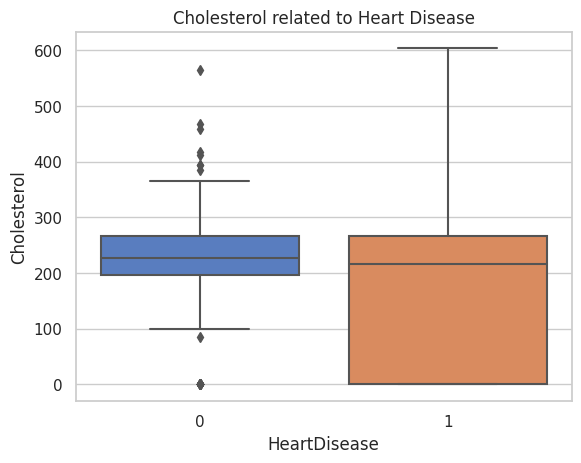

In [10]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Cholesterol'
)
ax.set_title('Cholesterol related to Heart Disease')

Peharps there are many outliers candidates, there are not great difference between classes mean.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Chest Pain distribution related to Heart Disease')

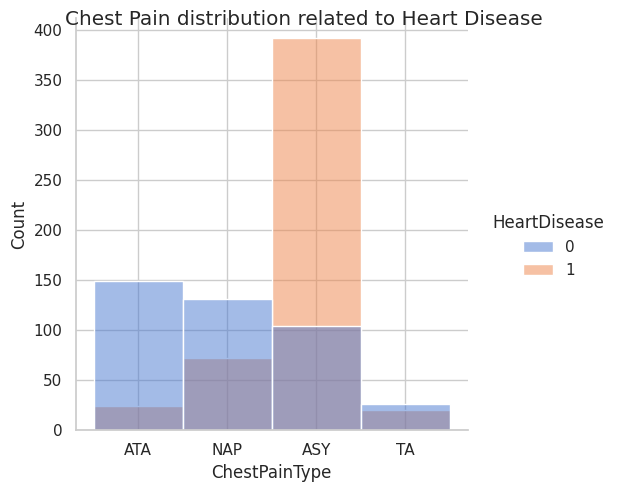

In [11]:
ax = sns.displot(
    data = dataset,
    x = 'ChestPainType',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Chest Pain distribution related to Heart Disease')

The most frequent chest pain in heart diseases seems to be asymptomatic (`ASY`).

Text(0.5, 1.0, 'Resting Blood Pressure (mmHg) related to Heart Diseases')

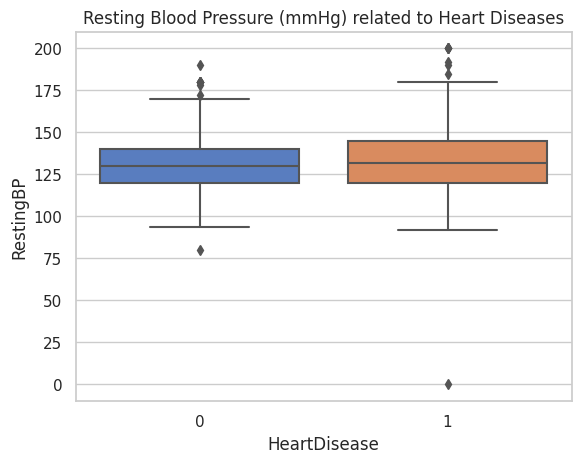

In [12]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'RestingBP'
)
ax.set_title('Resting Blood Pressure (mmHg) related to Heart Diseases')

There is a outlier with blood pressure equal `0` that is probably a missing data. I'll removing it from visualization:

Text(0.5, 1.0, 'Resting Blood Pressure (mmHg) related to Heart Diseases')

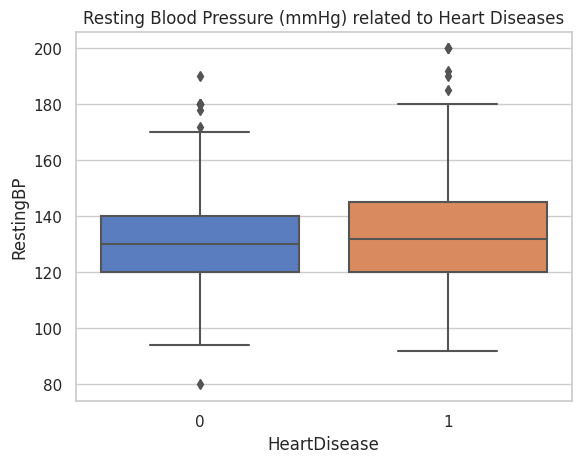

In [13]:
ax = sns.boxplot(
    data = dataset.query('RestingBP > 0'),
    x = 'HeartDisease',
    y = 'RestingBP'
)
ax.set_title('Resting Blood Pressure (mmHg) related to Heart Diseases')

Despite outliers, there is little difference between resting blood pressure between classes.

Text(0.5, 1.0, 'Maximun Heart Rate related to Heart Diseases')

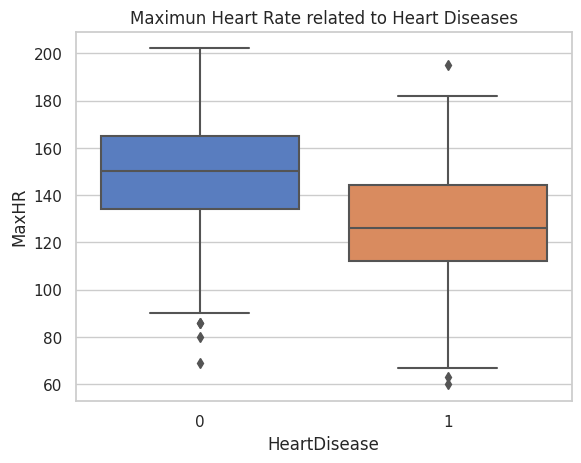

In [14]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'MaxHR'
)
ax.set_title('Maximun Heart Rate related to Heart Diseases')

There is a great difference on maximun heart rate mean between classes.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Fasting Blood Sugar (> 120 mg/dl)')

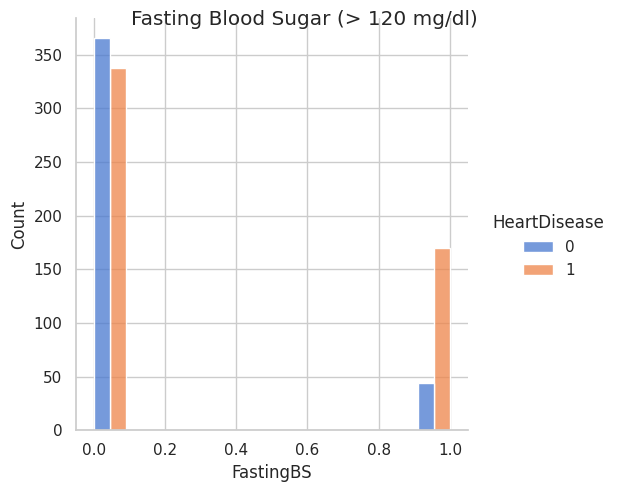

In [15]:
ax = sns.displot(
    data = dataset,
    x = 'FastingBS',
    hue = 'HeartDisease',
    multiple = 'dodge'
)
ax.fig.suptitle('Fasting Blood Sugar (> 120 mg/dl)')

Fastin blood sugar over 120 mg/dl seems to be more frequent on patients with heart diseases.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Resting Eletrocardiogram Result related to Heart Diseases')

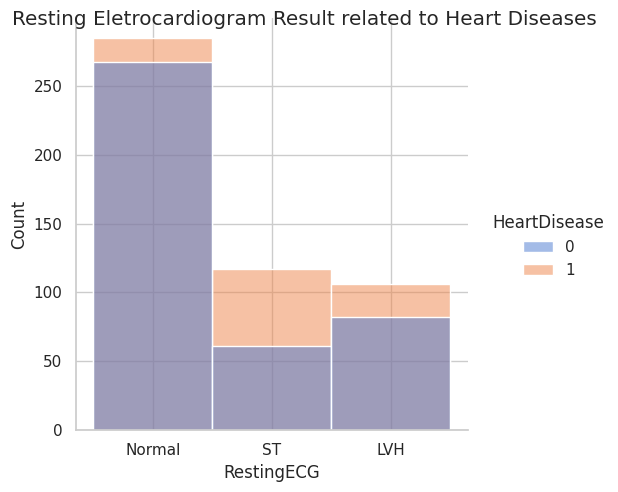

In [16]:
ax = sns.displot(
    data = dataset,
    x = 'RestingECG',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Resting Eletrocardiogram Result related to Heart Diseases')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Exercise-induced Angina related to Heart Diseases')

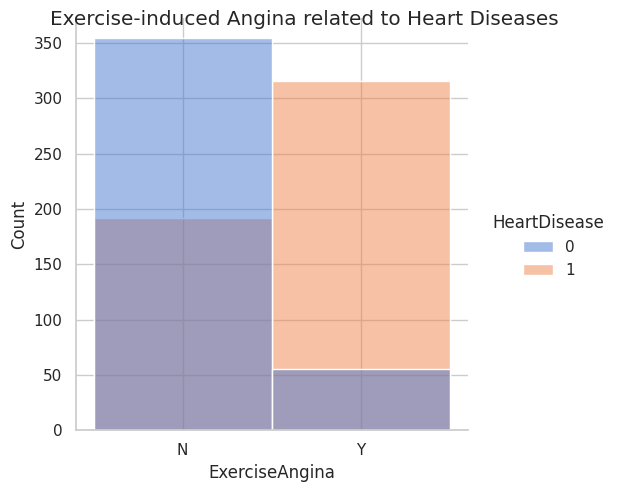

In [17]:
ax = sns.displot(
    data = dataset,
    x = 'ExerciseAngina',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Exercise-induced Angina related to Heart Diseases')

The exercise-induced angina presence seems to be more related to heart diseases.

Text(0.5, 1.0, 'Old Peak related to Heart Diseases')

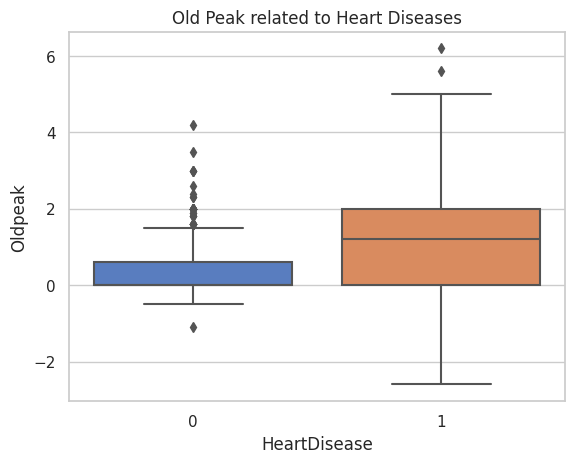

In [18]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Oldpeak'
)
ax.set_title('Old Peak related to Heart Diseases')

Oldpeak are strong related to heart diseases development.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Slope of the peak exercise related to Heart Diseases')

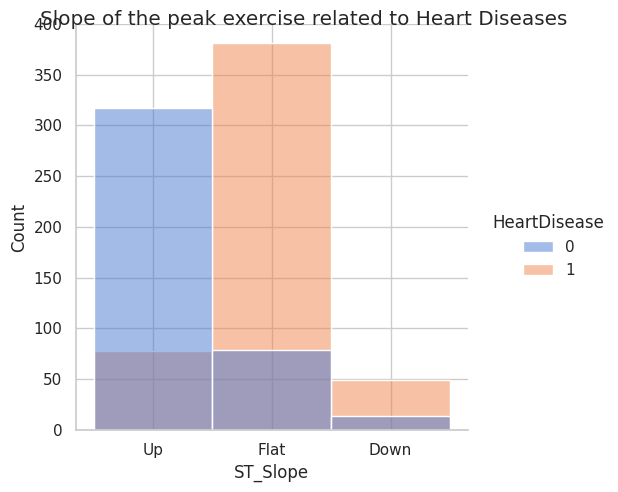

In [19]:
ax = sns.displot(
    data = dataset,
    x = 'ST_Slope',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Slope of the peak exercise related to Heart Diseases')

Patients with `ST_Slope` values equals `Flat` or `Down` seems to be more susceptible to heart diseases.

# Correlation Matrix

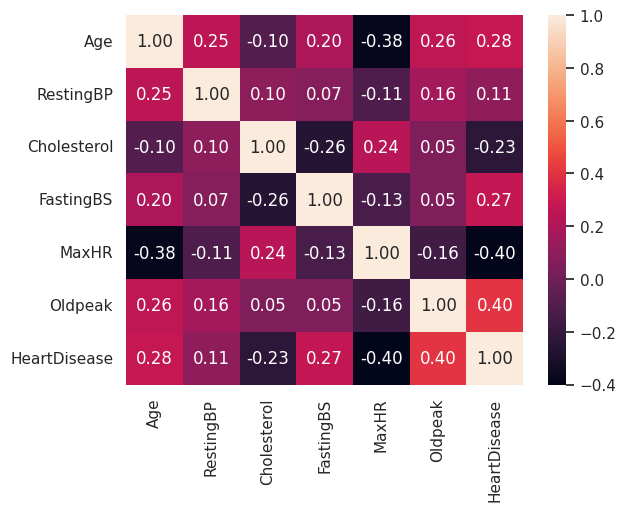

In [20]:
corr_matrix = dataset.corr(numeric_only = True)
ax = sns.heatmap(
    data = corr_matrix,
    annot = True,
    fmt = '.2f'
)

Correlation of `MaxHR` with `Age` and `Cholesterol` are high. I'm going to remove `Cholesterol` from analysis, because it is strong related to `FastingBS` and `MaxHR`, these two last are good indicator of heart disease, base on data visualization. I'm also will remove `Age` from analysis, because it is strong related to `Oldpeak`, `FastingBS`, and `RestingBP`, which probably occurs because advanced age cause some instability on these features.

# Data treatment

Removingo missing data/outliers.

In [21]:
dataset = dataset.query('RestingBP > 0')

Get dummies to categoric data.

In [22]:
sex_dummies = dataset['Sex'].map({'M': 1, 'F': 0})
exercise_angina_dummies = dataset['ExerciseAngina'].map({'Y': 1, 'N': 0})
resting_ecg_dummies = pd.get_dummies(dataset['RestingECG'])
st_slope_dummies = pd.get_dummies(dataset['ST_Slope'])
chest_pain_type_dummies = pd.get_dummies(dataset['ChestPainType'])

dataset = pd.concat(
    [
        dataset.drop(
            columns=['Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope', 'ChestPainType']
        ),
        sex_dummies, exercise_angina_dummies, resting_ecg_dummies, 
        st_slope_dummies, chest_pain_type_dummies
    ]
    , 
    axis =1
)

# Splitting X and y

In [23]:
y = dataset['HeartDisease']
X = dataset.drop(columns = ['HeartDisease', 'Age', 'Cholesterol'])

# Decision Tree analysis

## Train model and search for best hyperparams

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from scipy.stats import randint

np.random.seed(42)

cv = StratifiedKFold(n_splits = 8, shuffle = True)

params_space = {
    'max_depth': randint(1,8) ,
    'min_samples_leaf': randint(10, 100),
    'criterion': ['gini', 'entropy', 'log_loss']
}

search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    params_space,
    cv = cv,
    n_iter = 1000,
)

search.fit(X, y)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004194,0.000808,0.002443,0.000205,log_loss,4,24,"{'criterion': 'log_loss', 'max_depth': 4, 'min...",0.843478,0.834783,0.852174,0.791304,0.869565,0.894737,0.885965,0.807018,0.847378,0.033901,121
1,0.003881,0.000126,0.002275,0.000109,log_loss,5,30,"{'criterion': 'log_loss', 'max_depth': 5, 'min...",0.852174,0.834783,0.852174,0.791304,0.869565,0.894737,0.885965,0.824561,0.850658,0.031638,46
2,0.003500,0.000117,0.002333,0.000137,log_loss,2,92,"{'criterion': 'log_loss', 'max_depth': 2, 'min...",0.791304,0.808696,0.878261,0.756522,0.808696,0.842105,0.877193,0.745614,0.813549,0.046721,453
3,0.003744,0.000179,0.002875,0.001327,log_loss,3,84,"{'criterion': 'log_loss', 'max_depth': 3, 'min...",0.791304,0.808696,0.878261,0.756522,0.808696,0.842105,0.877193,0.745614,0.813549,0.046721,453
4,0.003653,0.000084,0.002195,0.000062,gini,4,33,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.834783,0.834783,0.852174,0.791304,0.869565,0.894737,0.877193,0.807018,0.845195,0.032976,209


In [25]:
results.sort_values("mean_test_score", ascending=False)[["mean_test_score", "params"]].head(5)

,mean_test_score,params
184,0.855034,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
463,0.855034,"{'criterion': 'gini', 'max_depth': 4, 'min_sam..."
493,0.855034,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
207,0.855034,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
201,0.855034,"{'criterion': 'gini', 'max_depth': 6, 'min_sam..."


In [26]:
best_model = search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=21)

# Naive Bayes Analysis

## Train/test splitting

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    shuffle = True,
    test_size = 0.3
)

## Normalize

In [28]:
from sklearn.preprocessing import StandardScaler

X_train_normalized = StandardScaler().fit_transform(X_train)
X_test_normalized = StandardScaler().fit_transform(X_test)

## Training model

In [29]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)
acc = nb.score(X_test, y_test)
print('Accuracy: %.2f' % (acc * 100))

Accuracy: 84.06


Text(0.5, 1.0, 'Confusion Matrix  - Bernoulli Naive Bayes Analysis')

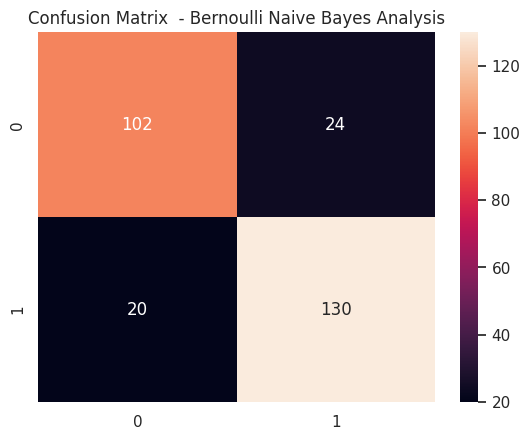

In [30]:
from sklearn.metrics import confusion_matrix

prediction = nb.predict(X_test)
matrix = confusion_matrix(y_test, prediction)
ax = sns.heatmap(
    data = matrix,
    annot = True,
    fmt = 'd'
)
ax.set_title('Confusion Matrix  - Bernoulli Naive Bayes Analysis')

## Cross-validation

I'm going to apply some cross validation techniques. First, I'm going to apply just StratifiedKFold with shuffle to avoid problems with ordering or other bias.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

np.random.seed(42)

normalizer = StandardScaler()
bnb = BernoulliNB()

pipeline = Pipeline([
    ('normalizer', normalizer),
    ('model', bnb)
])

cv = StratifiedKFold(n_splits = 10, shuffle =  True)
results = cross_validate(pipeline, X, y, cv=cv)

mean_score = results['test_score'].mean()
std_score = results['test_score'].std()

print('Accuracy Mean: %.2f' % (mean_score * 100))
print(
    'Accuracy range: [%.2f, %.2f]'
    % ((mean_score - 2 * std_score) * 100, (mean_score + 2 * std_score) * 100)
)

Accuracy Mean: 84.95
Accuracy range: [79.79, 90.10]
